# Demonstration: Neural network classifier 

In [1]:
import numpy as np
import scipy as sp
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
print('You have numpy version:', np.__version__, '(Note that numpy version >= 2.0 implies breaking changes)')

You have numpy version: 1.26.4 (Note that numpy version >= 2.0 implies breaking changes)


In [2]:
import tensorflow as tf
print('You have tensorflow version:', tf.__version__, '(should be at least 2.0.0)')

You have tensorflow version: 2.17.0 (should be at least 2.0.0)


Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. 

### Explore the data

In [4]:
# The shape of the training data
x_train.shape

(60000, 28, 28)

In [5]:
# Each training label is an integer
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

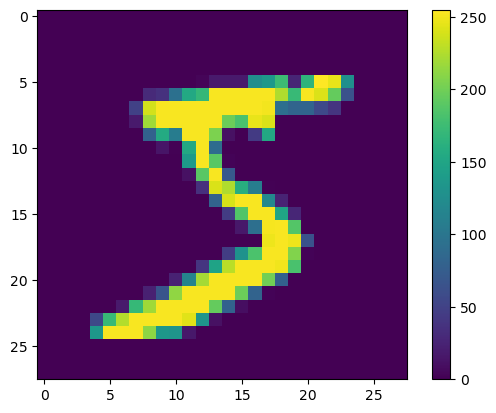

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar();

Not needed, but normalization of input data usually improves performance by making weights of natural size. Here we scale input pixel values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way.

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

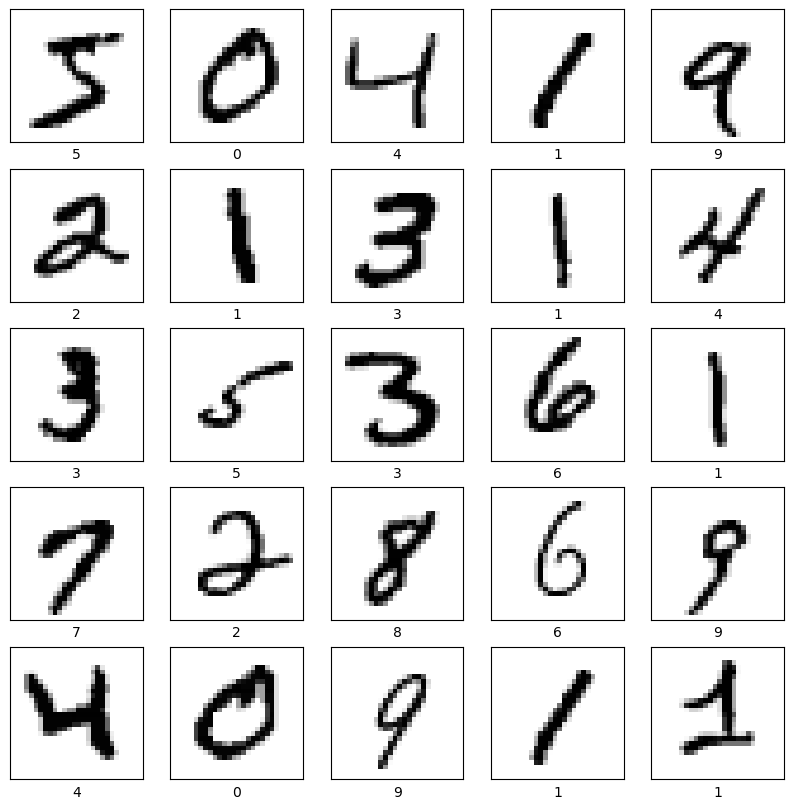

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))


### Build the network

Build the [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) model by stacking layers. Choose an optimizer and loss function for training:

In [9]:
# With or without an extra, hidden layer
includeHiddenLayer=False

if includeHiddenLayer:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(28, 28)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

We can print a summary of the model that also shows the number of parameters.

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
weights=model.get_weights()

In [12]:
for i in range(len(weights)):
    print(i, ':', weights[i].shape)

0 : (784, 10)
1 : (10,)


Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

* *Loss function* — This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* — This is how the model is updated based on the data it sees and its loss function.
* *Metrics* — Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified. 

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train and evaluate the model:

The simplest way to fit data is to just specify a number of epochs. During training the data will be fed through the network this many times. If unspecified, `batch_size` will default to 32.

In [14]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 216us/step - accuracy: 0.8178 - loss: 0.7223
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.9143 - loss: 0.3098
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step - accuracy: 0.9210 - loss: 0.2875
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.9244 - loss: 0.2762
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 216us/step - accuracy: 0.9263 - loss: 0.2632
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 223us/step - accuracy: 0.9272 - loss: 0.2569
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 217us/step - accuracy: 0.9294 - loss: 0.2571
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.9294 - loss: 0.2589
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 211us/step - accuracy: 0.9306 - loss: 0.2515
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step - accuracy: 0.9300 - loss: 0.2505


In [15]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [16]:
history.history['accuracy']

[0.8793666958808899,
 0.9154333472251892,
 0.9206666946411133,
 0.9238166809082031,
 0.925683319568634,
 0.9264166951179504,
 0.9283666610717773,
 0.9292500019073486,
 0.9294333457946777,
 0.9301833510398865]

### Make predictions and evaluate accuracy
Next, compare how the model performs on the test dataset:

In [17]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(f'\nTest accuracy: {test_acc:5.3f}')

313/313 - 0s - 282us/step - accuracy: 0.9284 - loss: 0.2631

Test accuracy: 0.928


With the model trained, you can use it to make predictions about some images.

In [18]:
predictions = model.predict(x_test)

# Let's look at the prediction for the first test image
predictions[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step


array([6.3233392e-07, 2.9109031e-12, 4.4238154e-06, 5.4285657e-03,
       1.6975466e-07, 2.5720488e-05, 5.9943322e-12, 9.9407941e-01,
       1.3236440e-05, 4.4791607e-04], dtype=float32)

In [19]:
# Check the normalization of the output probabilities
np.sum(predictions[0])

1.0

In [20]:
# Which prob is largest?
np.argmax(predictions[0])

7

In [21]:
# Examining the test label shows that this classification is correct:
y_test[0]

7

In [22]:
# Some helper functions for nice plotting
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(str(predicted_label),
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

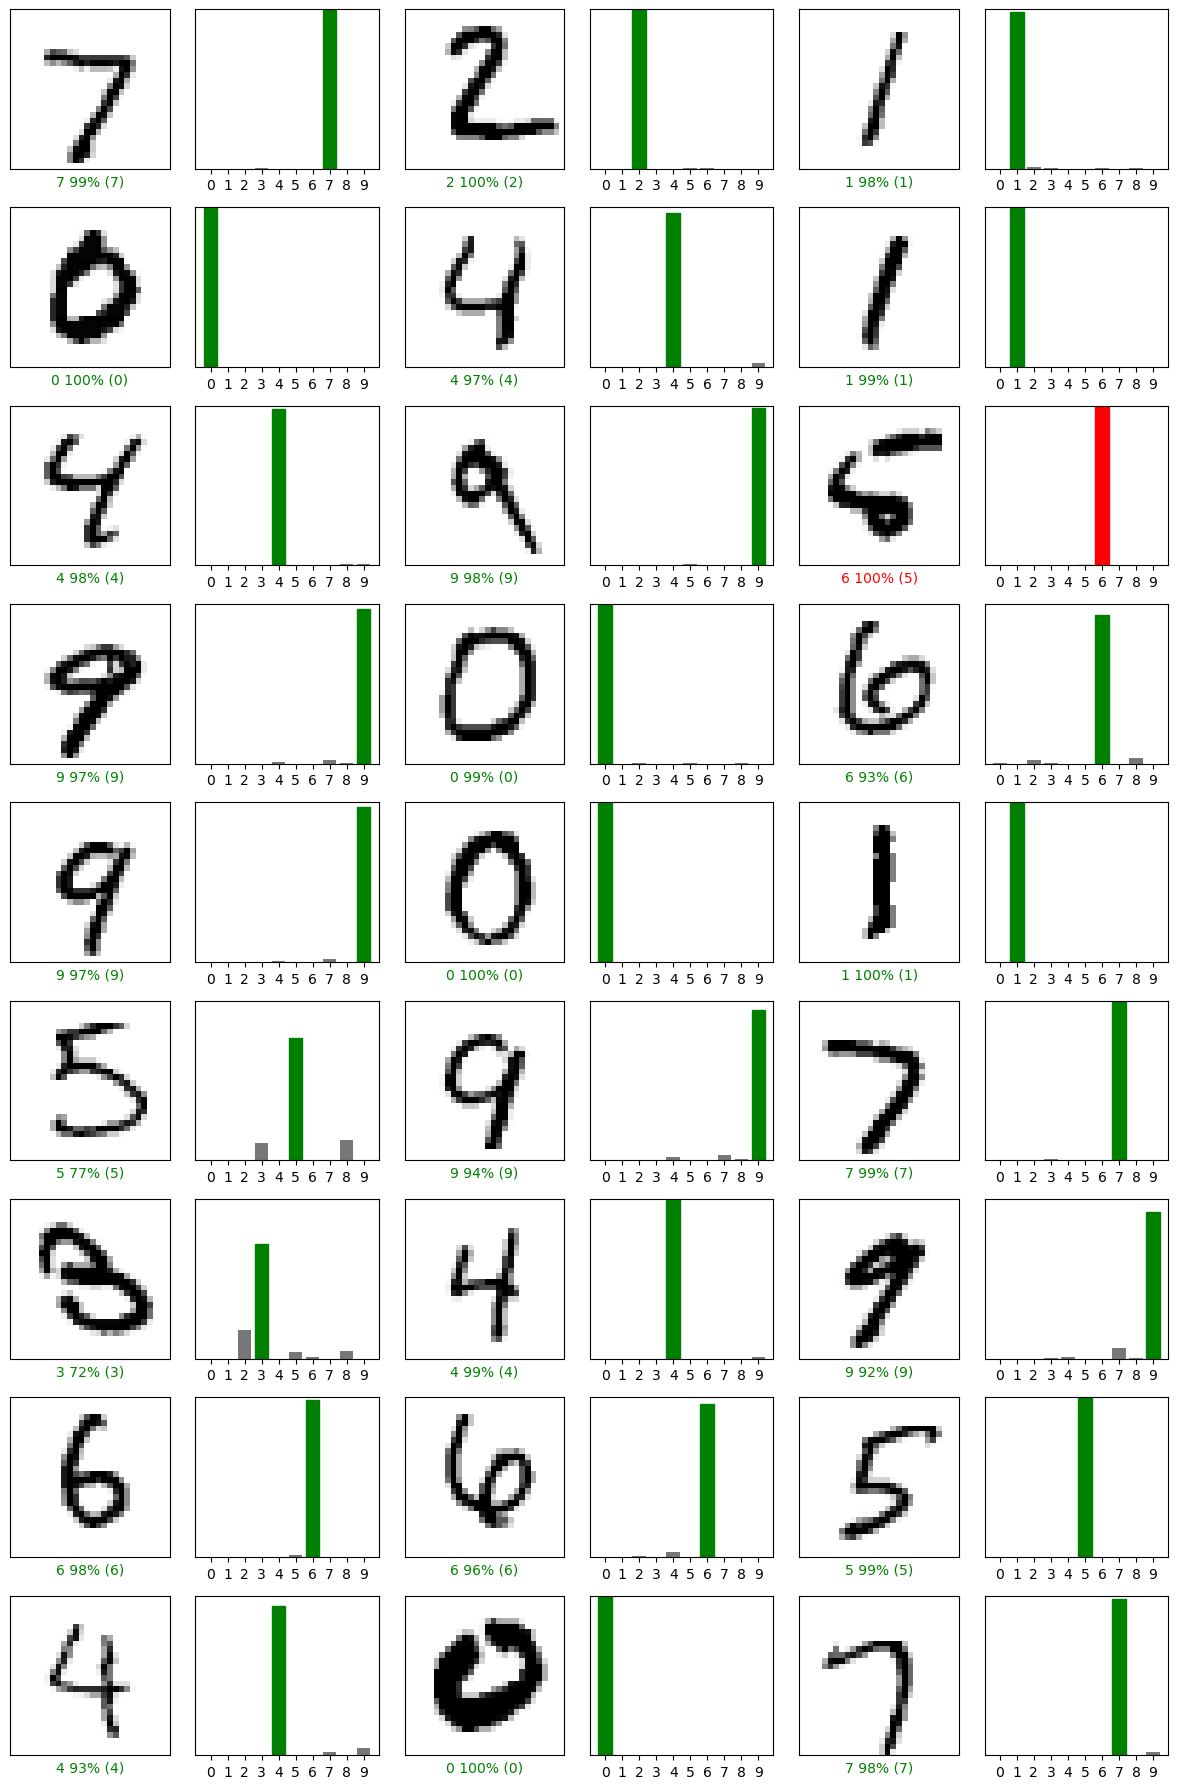

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 9
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()